<a href="https://colab.research.google.com/github/Buuuuli/AIPI540_individual/blob/main/try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=False)

Mounted at /content/drive


In [ ]:
#PROJ ="MyDrive/repos"
#PROJECT_PATH = join(ROOT, PROJ)
#!mkdir "PROJECT_PATH"

In [2]:
!ls

drive  sample_data


In [3]:
%cd /content/drive/"My Drive"/AIPI540

/content/drive/My Drive/AIPI540


In [3]:
import os
import urllib.request
import zipfile
import copy
import time
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import FashionMNIST
from torchsummary import summary
import cv2 as cv
import glob
from PIL import Image
import pickle as pkl
from tqdm import tqdm



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# check what types of image we get
#set the image directory
files = os.listdir("./image/")
# print the types of image
print(set([x.split(".")[1] for x in files]))


{'jpg'}


In [6]:
# prepare the directory for each image type
extensions = ("*.jpg")
path = []
for extension in extensions:
    path.extend(glob.glob("./image/"+extension))

In [7]:
# set the transforms
trans = transforms.Compose([transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
# read data
cv_img = []
for img in tqdm(path):
    # read image > to Tensor > permute the data > resize > flatten
    try:
      n = trans(cv.imread(img))
    except:
      print(img)
      pass
    cv_img.append(n)

  0%|          | 27/10016 [00:21<2:38:52,  1.05it/s]

./image/ISIC_0033327.jpg


  0%|          | 28/10016 [00:22<2:26:22,  1.14it/s]

./image/ISIC_0033335.jpg


  0%|          | 30/10016 [00:24<2:57:17,  1.07s/it]

./image/ISIC_0033358.jpg


  0%|          | 39/10016 [00:30<1:32:13,  1.80it/s]

In [ ]:
cv_img[2]

tensor([[[205, 169, 185],
         [207, 172, 186],
         [210, 176, 187],
         ...,
         [187, 150, 176],
         [183, 148, 174],
         [176, 145, 174]],

        [[202, 171, 186],
         [206, 175, 184],
         [208, 172, 186],
         ...,
         [182, 147, 174],
         [181, 147, 171],
         [176, 144, 175]],

        [[204, 171, 185],
         [204, 171, 185],
         [207, 171, 185],
         ...,
         [178, 147, 174],
         [179, 142, 174],
         [177, 142, 176]],

        ...,

        [[201, 171, 190],
         [199, 171, 190],
         [197, 170, 186],
         ...,
         [171, 132, 178],
         [169, 131, 179],
         [168, 132, 176]],

        [[204, 173, 188],
         [201, 174, 190],
         [205, 170, 190],
         ...,
         [178, 139, 184],
         [175, 139, 183],
         [172, 138, 178]],

        [[205, 171, 188],
         [204, 172, 191],
         [206, 170, 192],
         ...,
         [180, 145, 185],
        

In [ ]:
# Split training data to get a validation set
num_train = int(len(train_dataset) * 0.95)
split_train_dataset, split_valid_dataset = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

In [ ]:
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
#with open('./read_imgs.pkl','wb') as fp:
  #pkl.dump(cv_img,fp)

In [ ]:
with open('./read_imgs.pkl', 'rb') as fp:
  imgs = pkl.load(fp)

In [ ]:
# Instantiate pre-trained resnet
net = torchvision.models.resnet18(pretrained=True)
# Shut off autograd for all layers to freeze model so the layer weights are not trained
for param in net.parameters():
    param.requires_grad = False

# Display a summary of the layers of the model and output shape after each layer
summary(net,(images.shape[1:]),batch_size=batch_size,device="cpu")

In [ ]:
# Get the number of inputs to final Linear layer
num_ftrs = net.fc.in_features
# Replace final Linear layer with a new Linear with the same number of inputs but just 2 outputs,
# since we have 2 classes - bees and ants
net.fc = nn.Linear(num_ftrs, 2)

In [ ]:
# Cross entropy loss combines softmax and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
url1 = 'https://github.com/Buuuuli/AIPI540_individual/blob/main/metadata/raw_metadata.csv?raw=true'

In [9]:
url = 'https://github.com/Buuuuli/AIPI540_individual/blob/main/metadata/tidy_data.csv?raw=true'
df = pd.read_csv(url1,index_col=0)
print(df.head(5))

                 image_id   dx    dx_type   age     sex     localization
lesion_id                                                               
HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male            trunk
HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male  lower extremity
HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female            trunk
HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male            trunk
HAM_0003350  ISIC_0024310  mel      histo  60.0    male            chest


In [10]:
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [12]:
df['dx'] = df['dx'].map({"nv":0,"mel":1,"bkl":2,"bcc":3,"akiec":4,"vasc":5,"df":6})

In [13]:
# group age
bins =[0,10,20,30,40,50,60,70,80,90]
labels = ['children','teenage','young','adult','midage','old1','old2','old3','older']

df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df = df.drop("age", axis=1)

In [19]:
df.dx_type.value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [20]:
df['dx_type'] = df['dx_type'].map({"histo":0,"follow_up":1,"consensus":2,"confocal":3})

In [21]:
df.sex.value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [22]:
df['sex'] = df['sex'].map({"male":0,"female":1,"unknow":2})

In [30]:
df.localization.value_counts()

0.0     2192
1.0     2077
2.0     1404
3.0     1118
4.0     1022
5.0      745
6.0      407
7.0      319
9.0      168
10.0     128
11.0      90
12.0      56
13.0      48
14.0       7
Name: localization, dtype: int64

In [25]:
df['localization'] = df['localization'].map({"back":0,"lower extremity":1,"trunk":2,"upper extremity":3,"abdomen":4,"face":5,"chest":6,
                                             "foot":7,"unkown":8,"neck":9,"scalp":10,"hand":11,"ear":12,"genital":13,"acral":14})

In [32]:
df.ageGroup.value_counts()

midage      2284
old1        2196
old2        1534
old3        1374
adult       1217
older        694
young        416
children     125
teenage      118
Name: ageGroup, dtype: int64

In [33]:
df['ageGroup'] = df['ageGroup'].map({"teenage":0,"children":1,"young":2,"older":3,"adult":4,"old3":5,"old2":6,
                                             "old1":7,"midage":8})

In [34]:
df.head()

,image_id,dx,dx_type,sex,localization,ageGroup
lesion_id,,,,,,
HAM_0000550,ISIC_0024306,0,1,0.0,2.0,8
HAM_0003577,ISIC_0024307,0,1,0.0,1.0,7
HAM_0001477,ISIC_0024308,0,1,1.0,2.0,7
HAM_0000484,ISIC_0024309,0,1,0.0,2.0,8
HAM_0003350,ISIC_0024310,1,0,0.0,6.0,6


In [15]:
X_meta = df[['dx_type','sex','localization','ageGroup']]

In [16]:
y_meta = df[['dx']]

In [17]:
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2,shuffle=True ,random_state=45)

In [18]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None],'max_depth':[7]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model,params,cv=3,verbose=10)
grid_search.fit(X_train_meta,y_train_meta)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100
[CV 1/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100
[CV 2/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100
[CV 3/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3; 2/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000
[CV 1/3; 2/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/p

ValueError: ignored

In [ ]:
#tree_model = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,random_state=20)

In [ ]:
# Fit the tree to the data
#tree_model.fit(X_train_meta, y_train_meta)

DecisionTreeClassifier(max_depth=7, random_state=20)

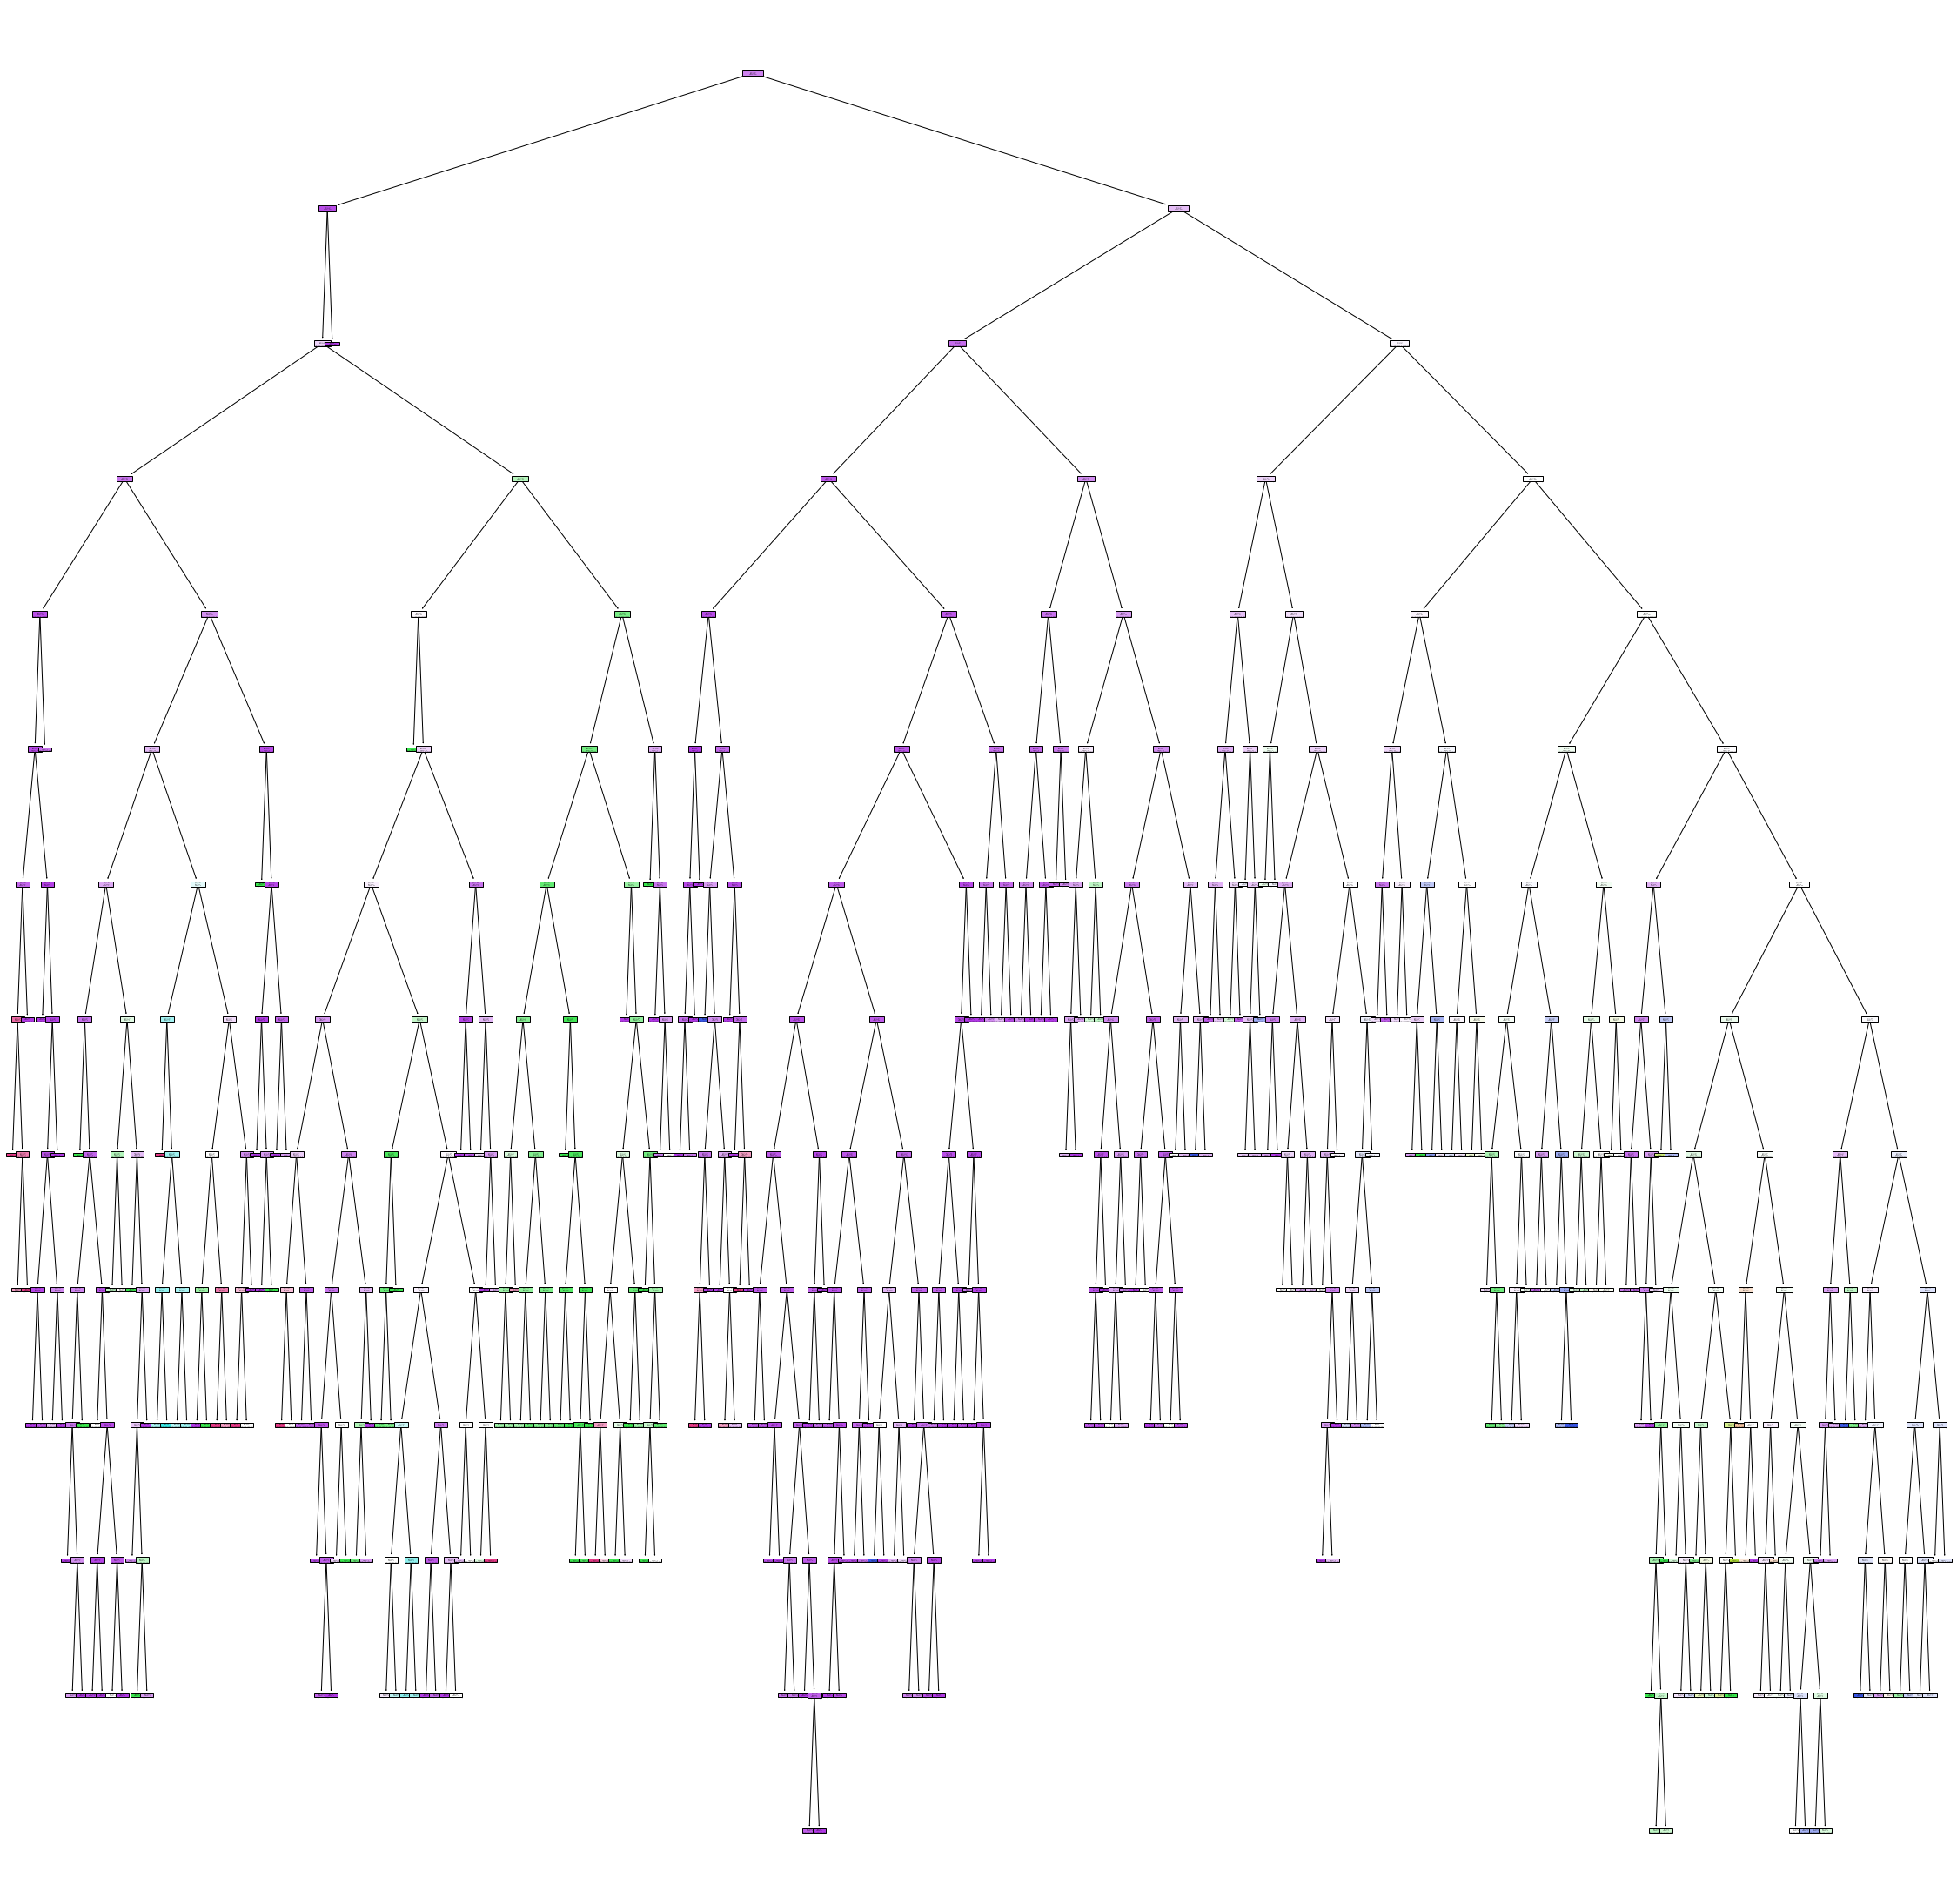

In [ ]:
plt.figure(figsize=(40,40))
plot_tree(tree_model,filled=True)
plt.show()

In [ ]:
test_preds = tree_model.predict(X_test_meta).reshape(len(X_test_meta),1)
test_acc = np.sum(test_preds==y_test_meta)/len(y_test_meta)
#print('Test set accuracy is {:.3f}'.format(test_acc))

In [ ]:
test_acc

dx    0.707439
dtype: float64